# Histogram

In [8]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import skimage

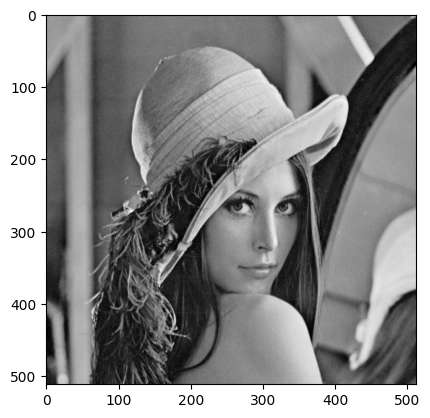

In [9]:
im = cv2.imread("CoverImages/lena.tiff",0)
plt.imshow(im, cmap='gray')
plt.show()

In [10]:
imvector = list(im.ravel())
gs = [x for x in range(256)]

In [11]:
fre = []
for x in gs:
    fre.append(imvector.count(x))

In [12]:
fre1 = []
for i in range(256):
    fre1.append(fre[i]/(512*512))


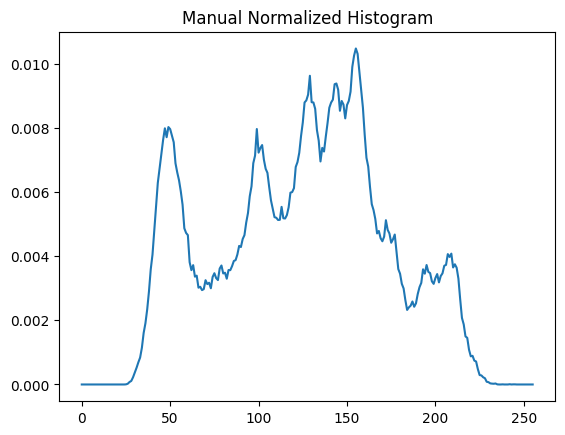

In [13]:
plt.plot(gs,fre1)
plt.title("Manual Normalized Histogram")
plt.show()

# Histogram Equilization    

In [14]:
list  = []
sum(list)

0

In [15]:
for i in range(256):
    list.append(fre1[i]+sum(list))

In [16]:
Sk1 = []

Sk1 = 255*list

In [17]:
Sk = []

import math as mt 
for i in range(255):
    Sk.append(mt.ceil(Sk1[i]))

In [18]:
Rk = [0,1,2,3,4,5,6,7]
Nk = [790,1023,850,656,329,245,122,81]
L = 8
M = N = 64
Pk = []
for i in range(L):
    Pk.append(Nk[i]/(M*N))


In [19]:
Rk = gs
Nk = fre
L = 256
M = N = 512
Pk = []
for i in range(L):
    Pk.append(Nk[i]/(M*N))

In [20]:
Cp = []
for i in range(L):
    sum = 0
    for j in range(L-i):
        sum += Pk[j]
    Cp.append(sum)
Cp.reverse()

In [21]:
Sk = []
for i in range(L):
    Sk.append((L-1)*Cp[i])

In [22]:
RoundSK = []
for i in range(L):
    RoundSK.append(round(Sk[i]))

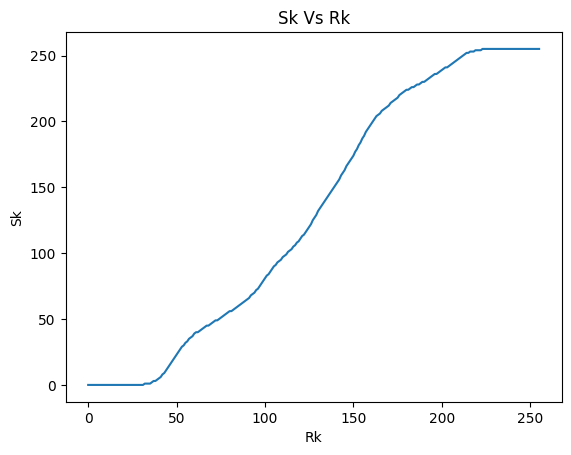

In [23]:
plt.plot(Rk,RoundSK)
plt.xlabel('Rk')
plt.ylabel('Sk')
plt.title("Sk Vs Rk")
plt.show()

In [24]:
myarray = np.zeros(L, dtype=int)
for i in set(RoundSK):
    si = RoundSK.index(i)
    c = RoundSK.count(i)
    s = 0
    for j in range(c):
        s += Nk[si+j]
    myarray[i] = s

In [25]:
X_Sk = Rk
Y_Fre_NK = []
for i in range(L):
    Y_Fre_NK.append(myarray[i]/ (M*N))

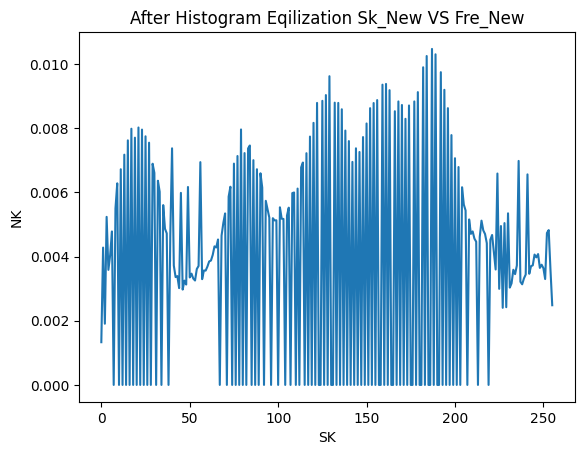

In [26]:
plt.plot(X_Sk,Y_Fre_NK)
plt.xlabel('SK')
plt.ylabel('NK')
plt.title("After Histogram Eqilization Sk_New VS Fre_New")
plt.show()

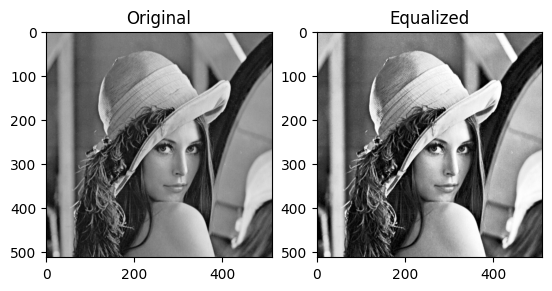

In [28]:

def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram

def calculate_cdf(histogram):
    cdf = histogram.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    return cdf_normalized

def apply_histogram_equalization(image, cdf_normalized):
    equalized_image = np.interp(image.flatten(), np.arange(256), cdf_normalized)
    equalized_image = equalized_image.reshape(image.shape)
    return equalized_image.astype(np.uint8)

image = cv2.imread('CoverImages/lena.tiff',0)
histogram = calculate_histogram(image)
cdf_normalized = calculate_cdf(histogram)

equalized_image = apply_histogram_equalization(image, cdf_normalized)
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized')
plt.show()

# Entropy

In [29]:
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_normalized = hist / np.sum(hist)
    entropy = -np.sum(hist_normalized * np.log2(hist_normalized + 1e-10))
    return entropy

In [30]:
calculate_entropy(im)

7.44504

# Convolution Operation 

In [31]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

In [32]:
kernel = [
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
]

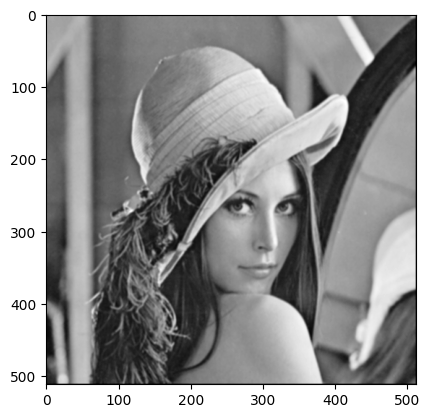

In [35]:
img = cv2.imread('CoverImages/lena.tiff',0)
result = convolution(img,kernel)
plt.imshow(result,cmap='gray')
plt.show()

# LZW

In [36]:
def lzw_encode(data):
    dictionary = {chr(i): i for i in range(256)}
    encoded_data = []
    current_code = 256
    buffer = ''
    for symbol in data:
        if buffer + symbol in dictionary:
            buffer += symbol
        else:
            encoded_data.append(dictionary[buffer])
            dictionary[buffer + symbol] = current_code
            current_code += 1
            buffer = symbol
    if buffer:
        encoded_data.append(dictionary[buffer])
    return encoded_data

In [37]:
def lzw_decode(encoded_data):
    dictionary = {i: chr(i) for i in range(256)}
    decoded_data = []
    current_code = 256
    previous_code = encoded_data[0]
    decoded_data.append(dictionary[previous_code])
    for code in encoded_data[1:]:
        if code in dictionary:
            entry = dictionary[code]
        elif code == current_code:
            entry = dictionary[previous_code] + dictionary[previous_code][0]
        else:
            raise ValueError("Bad compressed code")

        decoded_data.append(entry)
        dictionary[current_code] = dictionary[previous_code] + entry[0]
        current_code += 1
        previous_code = code
    return ''.join(decoded_data)

In [38]:
original_text = "TOBEORNOTTOBEORTOBEORNOT"
encoded_text = lzw_encode(original_text)
print("Encoded data:", encoded_text)

Encoded data: [84, 79, 66, 69, 79, 82, 78, 79, 84, 256, 258, 260, 265, 259, 261, 263]


In [39]:
decoded_text = lzw_decode(encoded_text)
print("Decoded data:", decoded_text)

Decoded data: TOBEORNOTTOBEORTOBEORNOT


# Arithmetic

In [41]:
class ArithmeticEncoder:
    def __init__(self):
        self.low = 0
        self.high = 1
        self.range = 1

    def encode(self, data, probabilities):
        for symbol in data:
            symbol_range = probabilities[symbol]
            self.update_range(symbol_range)
        return self.low

    def update_range(self, symbol_range):
        range_size = self.high - self.low
        self.high = self.low + range_size * symbol_range[1]
        self.low = self.low + range_size * symbol_range[0]

    def normalize_range(self):
        while True:
            if self.high < 0.5:
                self.low *= 2
                self.high *= 2
                self.range *= 2
            elif self.low >= 0.5:
                self.low = 2 * (self.low - 0.5)
                self.high = 2 * (self.high - 0.5)
                self.range *= 2
            elif 0.25 <= self.low < 0.75 and 0.25 < self.high <= 0.75:
                self.low = 2 * (self.low - 0.25)
                self.high = 2 * (self.high - 0.25)
                self.range *= 2
            else:
                break

    def get_encoded_value(self, data, probabilities):
        self.low = 0
        self.high = 1
        self.range = 1
        encoded_value = self.encode(data, probabilities)
        self.normalize_range()
        return encoded_value


In [42]:
class ArithmeticDecoder:
    def __init__(self):
        self.code = 0
        self.low = 0
        self.high = 1

    def decode(self, encoded_value, data_length, probabilities):
        decoded_data = []
        self.code = encoded_value
        for _ in range(data_length):
            symbol = self.decode_symbol(probabilities)
            decoded_data.append(symbol)
        return decoded_data

    def decode_symbol(self, probabilities):
        range_size = self.high - self.low
        for symbol, (low_range, high_range) in probabilities.items():
            symbol_range_size = high_range - low_range
            if (self.code - self.low) / range_size <= high_range and (self.code - self.low) / range_size > low_range:
                self.low = self.low + range_size * low_range
                self.high = self.low + range_size * symbol_range_size
                return symbol

    def normalize_range(self):
        while True:
            if self.high < 0.5:
                self.low *= 2
                self.high *= 2
            elif self.low >= 0.5:
                self.low = 2 * (self.low - 0.5)
                self.high = 2 * (self.high - 0.5)
            elif 0.25 <= self.low < 0.75 and 0.25 < self.high <= 0.75:
                self.low = 2 * (self.low - 0.25)
                self.high = 2 * (self.high - 0.25)
            else:
                break

    def get_decoded_data(self, encoded_value, data_length, probabilities):
        self.low = 0
        self.high = 1
        self.code = encoded_value
        decoded_data = self.decode(encoded_value, data_length, probabilities)
        self.normalize_range()
        return decoded_data

In [43]:
data = "ABBABBABBA"
probabilities = {'A': (0, 0.5), 'B': (0.5, 1)}

In [44]:
encoder = ArithmeticEncoder()
encoded_value = encoder.get_encoded_value(data, probabilities)
print("Encoded value:", encoded_value)

Encoded value: 0.427734375


In [45]:
decoder = ArithmeticDecoder()
decoded_data = decoder.get_decoded_data(encoded_value, len(data), probabilities)
print("Decoded data:", ''.join(decoded_data))

Decoded data: ABBABBABAB
